In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('data/df_train.csv')

In [ ]:
df.head()

,Unnamed: 0,Target,demog_1,demog_2,income,demog_3,city_tier,demog_4,demog_5,demog_6,...,os_ios,email_domain_aol,email_domain_gmail,email_domain_hotmail,email_domain_icloud,email_domain_idfc,email_domain_msn,email_domain_outlook,email_domain_rediff,email_domain_yahoo
0,0,0,53.0,3.0,2,101.0,0,0.0,3.0,1.0,...,1,0,1,0,0,0,0,0,0,0
1,1,0,55.0,1.0,1,101.0,1,0.0,2.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2,2,0,55.0,3.0,1,101.0,2,0.0,4.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,53.0,3.0,2,101.0,7,0.0,4.0,1.0,...,0,0,1,0,0,0,0,0,0,0
4,4,0,55.0,6.0,1,101.0,1,0.0,4.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
df.describe()

,Target,demog_1,demog_2,income,demog_3,city_tier,demog_4,demog_5,demog_6,demog_8,...,os_ios,email_domain_aol,email_domain_gmail,email_domain_hotmail,email_domain_icloud,email_domain_idfc,email_domain_msn,email_domain_outlook,email_domain_rediff,email_domain_yahoo
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.020000,78.64288,2.741460,1.826440,101.323260,3.193660,0.056220,3.29034,1.017180,41.184510,...,0.069570,0.000150,0.858890,0.003030,0.000950,0.003270,0.000040,0.001690,0.001970,0.011810
std,0.140001,87.96267,2.232596,0.958304,5.349851,2.948756,0.564679,0.83342,0.182552,0.630849,...,0.254422,0.012247,0.348137,0.054962,0.030808,0.057091,0.006324,0.041075,0.044341,0.108031
min,0.000000,51.00000,0.000000,0.000000,101.000000,0.000000,0.000000,1.00000,1.000000,41.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.00000,1.000000,1.000000,101.000000,1.000000,0.000000,3.00000,1.000000,41.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,55.00000,2.000000,2.000000,101.000000,2.000000,0.000000,4.00000,1.000000,41.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.00000,3.000000,2.000000,101.000000,6.000000,0.000000,4.00000,1.000000,41.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,421.00000,17.000000,11.000000,213.000000,8.000000,7.000000,4.00000,4.000000,52.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
features = df.drop(columns = ['Target'])
targets = df['Target']

In [ ]:
len(features.columns)

167

In [ ]:
targets.value_counts()

0    98000
1     2000
Name: Target, dtype: int64

In [ ]:
df[df['Target'] == 1].describe()

,Target,demog_1,demog_2,income,demog_3,city_tier,demog_4,demog_5,demog_6,demog_8,...,os_ios,email_domain_aol,email_domain_gmail,email_domain_hotmail,email_domain_icloud,email_domain_idfc,email_domain_msn,email_domain_outlook,email_domain_rediff,email_domain_yahoo
count,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.00000,2000.000000,...,2000.000000,2000.0,2000.00000,2000.000000,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.000000
mean,1.0,91.111000,2.899000,1.885000,101.019500,3.322000,0.0055,3.236500,1.00150,41.154500,...,0.029000,0.0,0.85700,0.000500,0.000500,0.0,0.0,0.0,0.0,0.002000
std,0.0,106.455117,2.007689,0.854482,0.200349,3.060392,0.1746,0.848486,0.04999,0.361518,...,0.167848,0.0,0.35016,0.022361,0.022361,0.0,0.0,0.0,0.0,0.044688
min,1.0,51.000000,1.000000,1.000000,101.000000,0.000000,0.0000,1.000000,1.00000,41.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,1.0,55.000000,1.000000,1.000000,101.000000,0.000000,0.0000,3.000000,1.00000,41.000000,...,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,1.0,55.000000,2.000000,2.000000,101.000000,2.000000,0.0000,3.000000,1.00000,41.000000,...,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,1.0,55.000000,3.000000,2.000000,101.000000,6.000000,0.0000,4.000000,1.00000,41.000000,...,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
max,1.0,401.000000,11.000000,7.000000,104.000000,8.000000,6.0000,4.000000,3.00000,42.000000,...,1.000000,0.0,1.00000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [ ]:
df[df['Target'] == 0].describe()

,Target,demog_1,demog_2,income,demog_3,city_tier,demog_4,demog_5,demog_6,demog_8,...,os_ios,email_domain_aol,email_domain_gmail,email_domain_hotmail,email_domain_icloud,email_domain_idfc,email_domain_msn,email_domain_outlook,email_domain_rediff,email_domain_yahoo
count,98000.0,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.00000,98000.000000
mean,0.0,78.388429,2.738245,1.825245,101.329459,3.191041,0.057255,3.291439,1.017500,41.185122,...,0.070398,0.000153,0.858929,0.003082,0.000959,0.003337,0.000041,0.001724,0.00201,0.012010
std,0.0,87.526774,2.236845,0.960272,5.403913,2.946392,0.569820,0.833078,0.184253,0.635143,...,0.255818,0.012371,0.348097,0.055427,0.030956,0.057668,0.006389,0.041491,0.04479,0.108932
min,0.0,51.000000,0.000000,0.000000,101.000000,0.000000,0.000000,1.000000,1.000000,41.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.0,55.000000,1.000000,1.000000,101.000000,1.000000,0.000000,3.000000,1.000000,41.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.0,55.000000,2.000000,2.000000,101.000000,2.000000,0.000000,4.000000,1.000000,41.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.0,55.000000,3.000000,2.000000,101.000000,6.000000,0.000000,4.000000,1.000000,41.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,0.0,421.000000,17.000000,11.000000,213.000000,8.000000,7.000000,4.000000,4.000000,52.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# Without Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [ ]:
y_train.value_counts()

0    78401
1     1599
Name: Target, dtype: int64

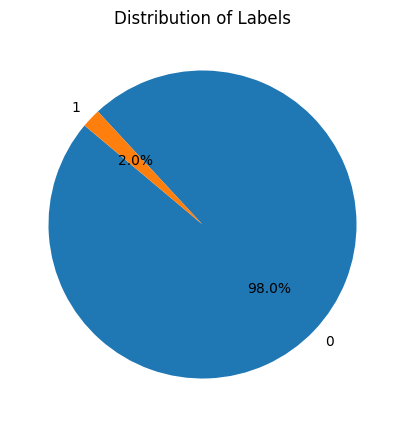

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.show()


## Need to upsample

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
0    78401
1    78401
Name: Target, dtype: int64


## Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
models = {'log_reg': LogisticRegression(), 'knn': KNeighborsClassifier(), 'svc': SVC(), 'dtc': DecisionTreeClassifier(), 'rnf': RandomForestClassifier(),
          'gbc': GradientBoostingClassifier(), 'etc': ExtraTreesClassifier(), 'gnb': GaussianNB(),
          'abc': AdaBoostClassifier(), 'xgb': XGBClassifier()}

In [ ]:
y_val.value_counts()*100/len(y_val)

0    98.0
1     2.0
Name: Target, dtype: float64

## Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.9808
Precision: 0.5107
Recall: 0.9550
F1 Score: 0.6655
ROC AUC: 0.9947


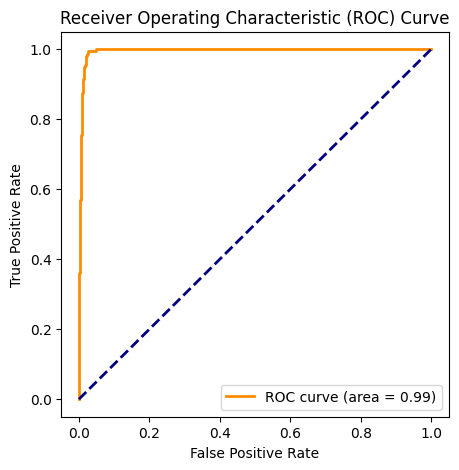

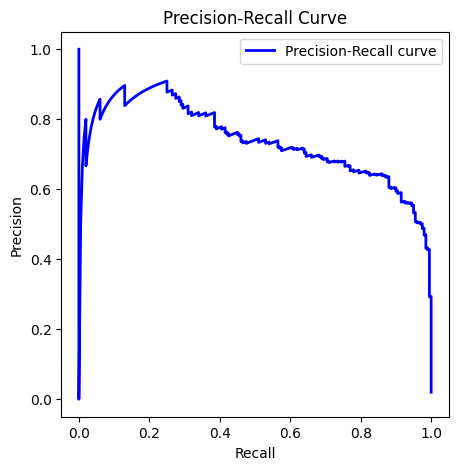

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc

y_pred = log_reg.predict(X_val)
y_pred_proba = log_reg.predict_proba(X_val)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## KNN Classifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

Accuracy: 0.9826
Precision: 0.5389
Recall: 0.9000
F1 Score: 0.6742
ROC AUC: 0.9645


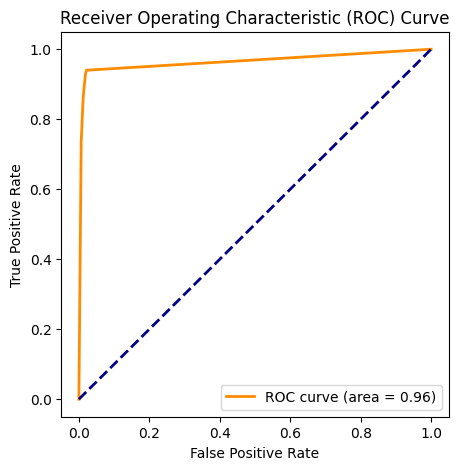

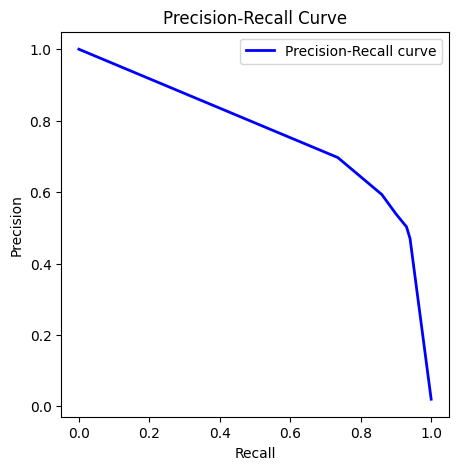

In [ ]:
y_pred = knn.predict(X_val)
y_pred_proba = knn.predict_proba(X_val)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Random Forest

In [ ]:
rnf = RandomForestClassifier()
rnf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

Accuracy: 0.9956
Precision: 0.8714
Recall: 0.9150
F1 Score: 0.8927
ROC AUC: 0.9992


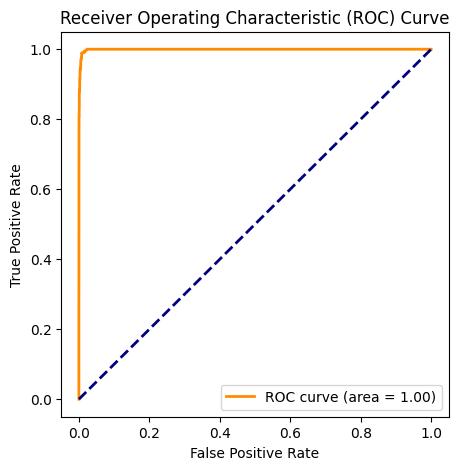

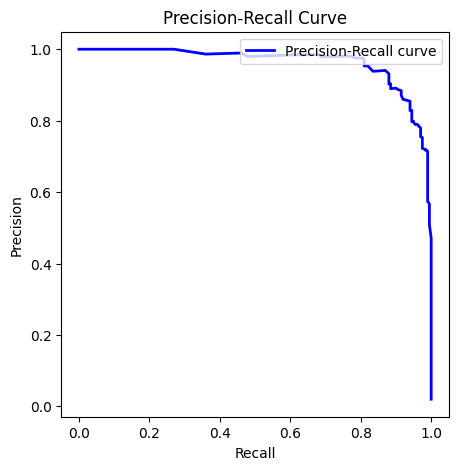

In [ ]:
y_pred = rnf.predict(X_val)
y_pred_proba = rnf.predict_proba(X_val)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Extra Trees Classifier

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(X_train_smote, y_train_smote)

ExtraTreesClassifier()

Accuracy: 0.9949
Precision: 0.8670
Recall: 0.8800
F1 Score: 0.8734
ROC AUC: 0.9989


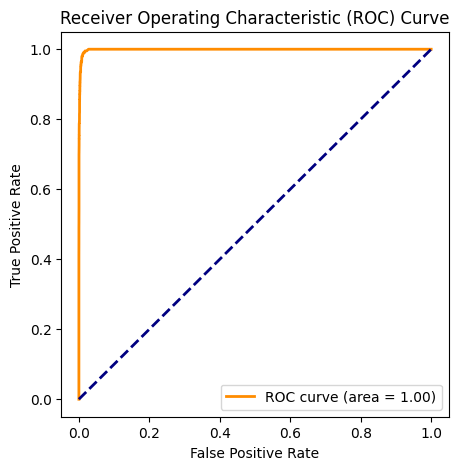

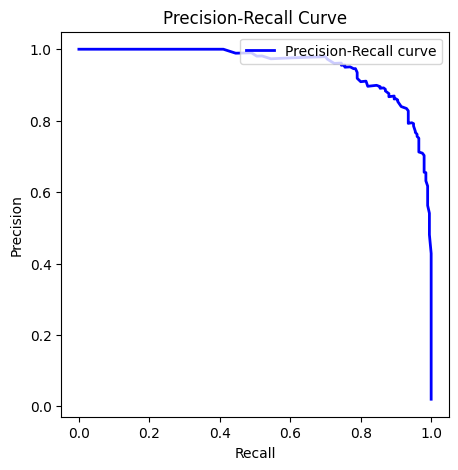

In [ ]:
y_pred = etc.predict(X_val)
y_pred_proba = etc.predict_proba(X_val)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## XGBoost

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.9959
Precision: 0.8804
Recall: 0.9200
F1 Score: 0.8998
ROC AUC: 0.9991


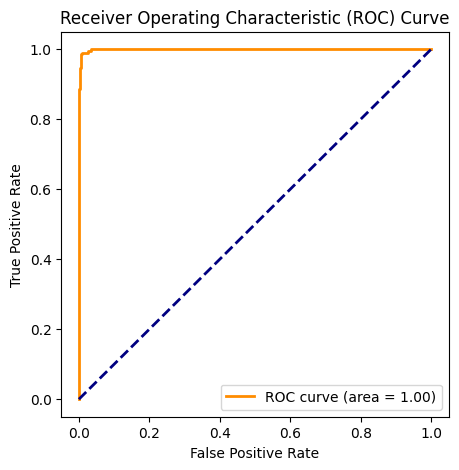

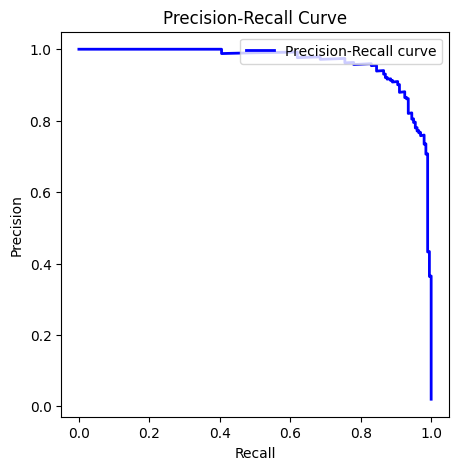

In [ ]:
y_pred = xgbc.predict(X_val)
y_pred_proba = xgbc.predict_proba(X_val)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## AdaBoost

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train_smote, y_train_smote)

AdaBoostClassifier()

Accuracy: 0.9947
Precision: 0.8356
Recall: 0.9150
F1 Score: 0.8735
ROC AUC: 0.9989


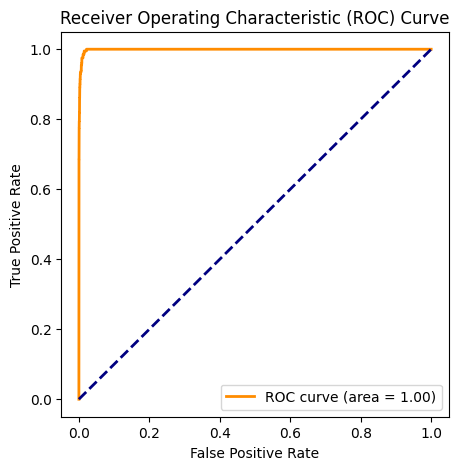

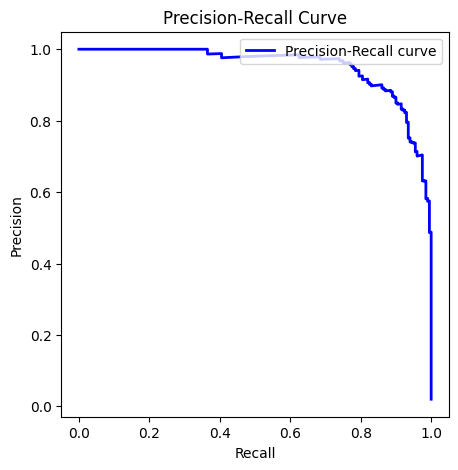

In [ ]:
y_pred = abc.predict(X_val)
y_pred_proba = abc.predict_proba(X_val)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## gaussian NB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)

GaussianNB()

Accuracy: 0.9855
Precision: 0.6000
Recall: 0.8250
F1 Score: 0.6947
ROC AUC: 0.9713


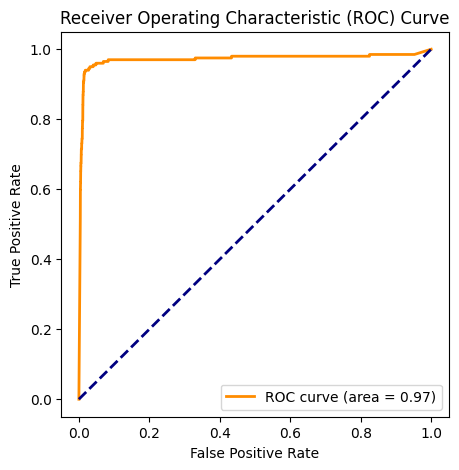

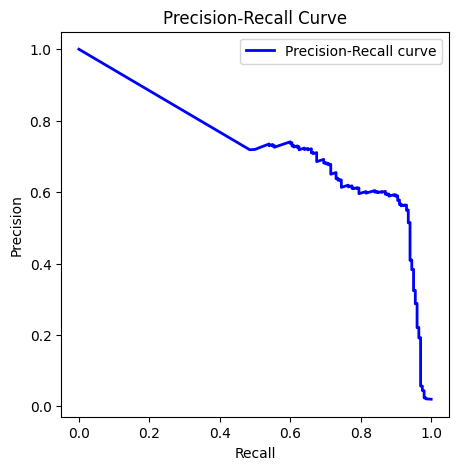

In [ ]:
y_pred = gnb.predict(X_val)
y_pred_proba = gnb.predict_proba(X_val)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier()

Accuracy: 0.9938
Precision: 0.7974
Recall: 0.9250
F1 Score: 0.8565
ROC AUC: 0.9902


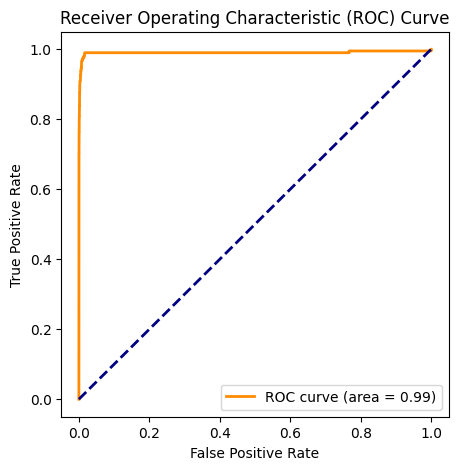

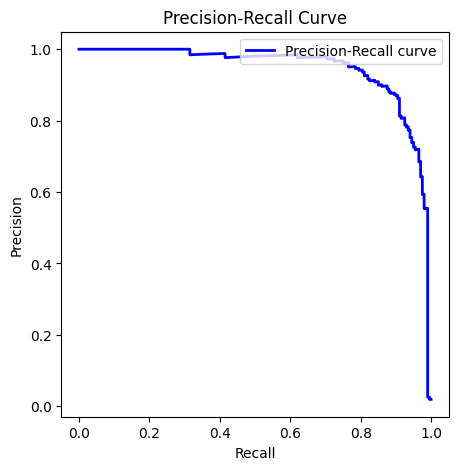

In [ ]:
y_pred = gbc.predict(X_val)
y_pred_proba = gbc.predict_proba(X_val)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Best Models so far:
> Gradient Boosting Classifier
<br>
> AdaBoost
<br>
> XGBoost(Best)
<br>
> Random Forest
<br>
> Extra Trees Classifier

# Using Feature Selection

## Random forest


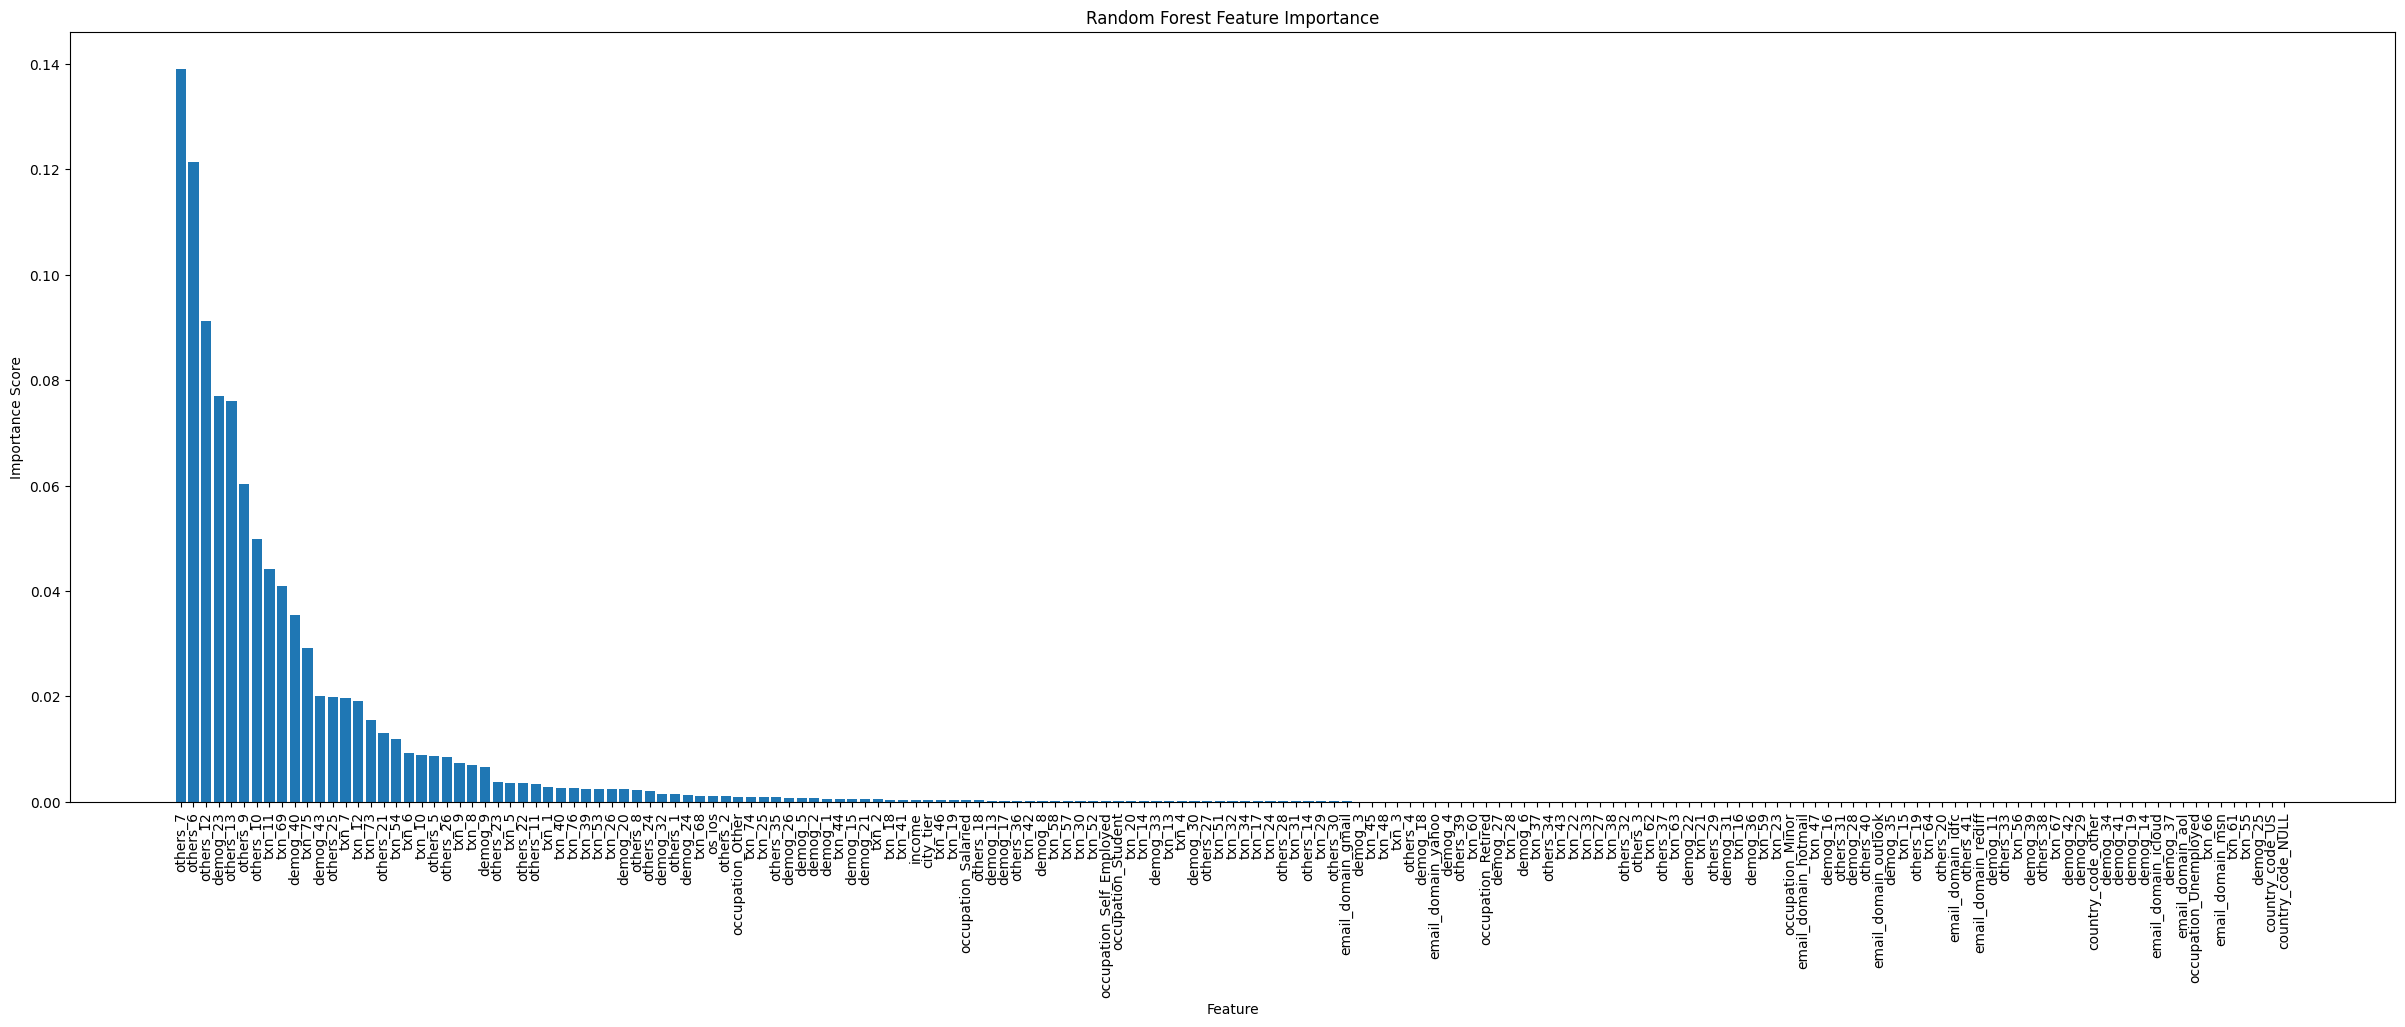

In [ ]:
importances = rnf.feature_importances_

# Get feature names
feature_names = X_train_smote.columns


# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
top_features_indices_rnf = indices[:75]

# Plot the feature importances
plt.figure(figsize=(30, 10))
plt.bar(range(X_train_smote.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_smote.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
rnf_top_75 = feature_names[top_features_indices_rnf]

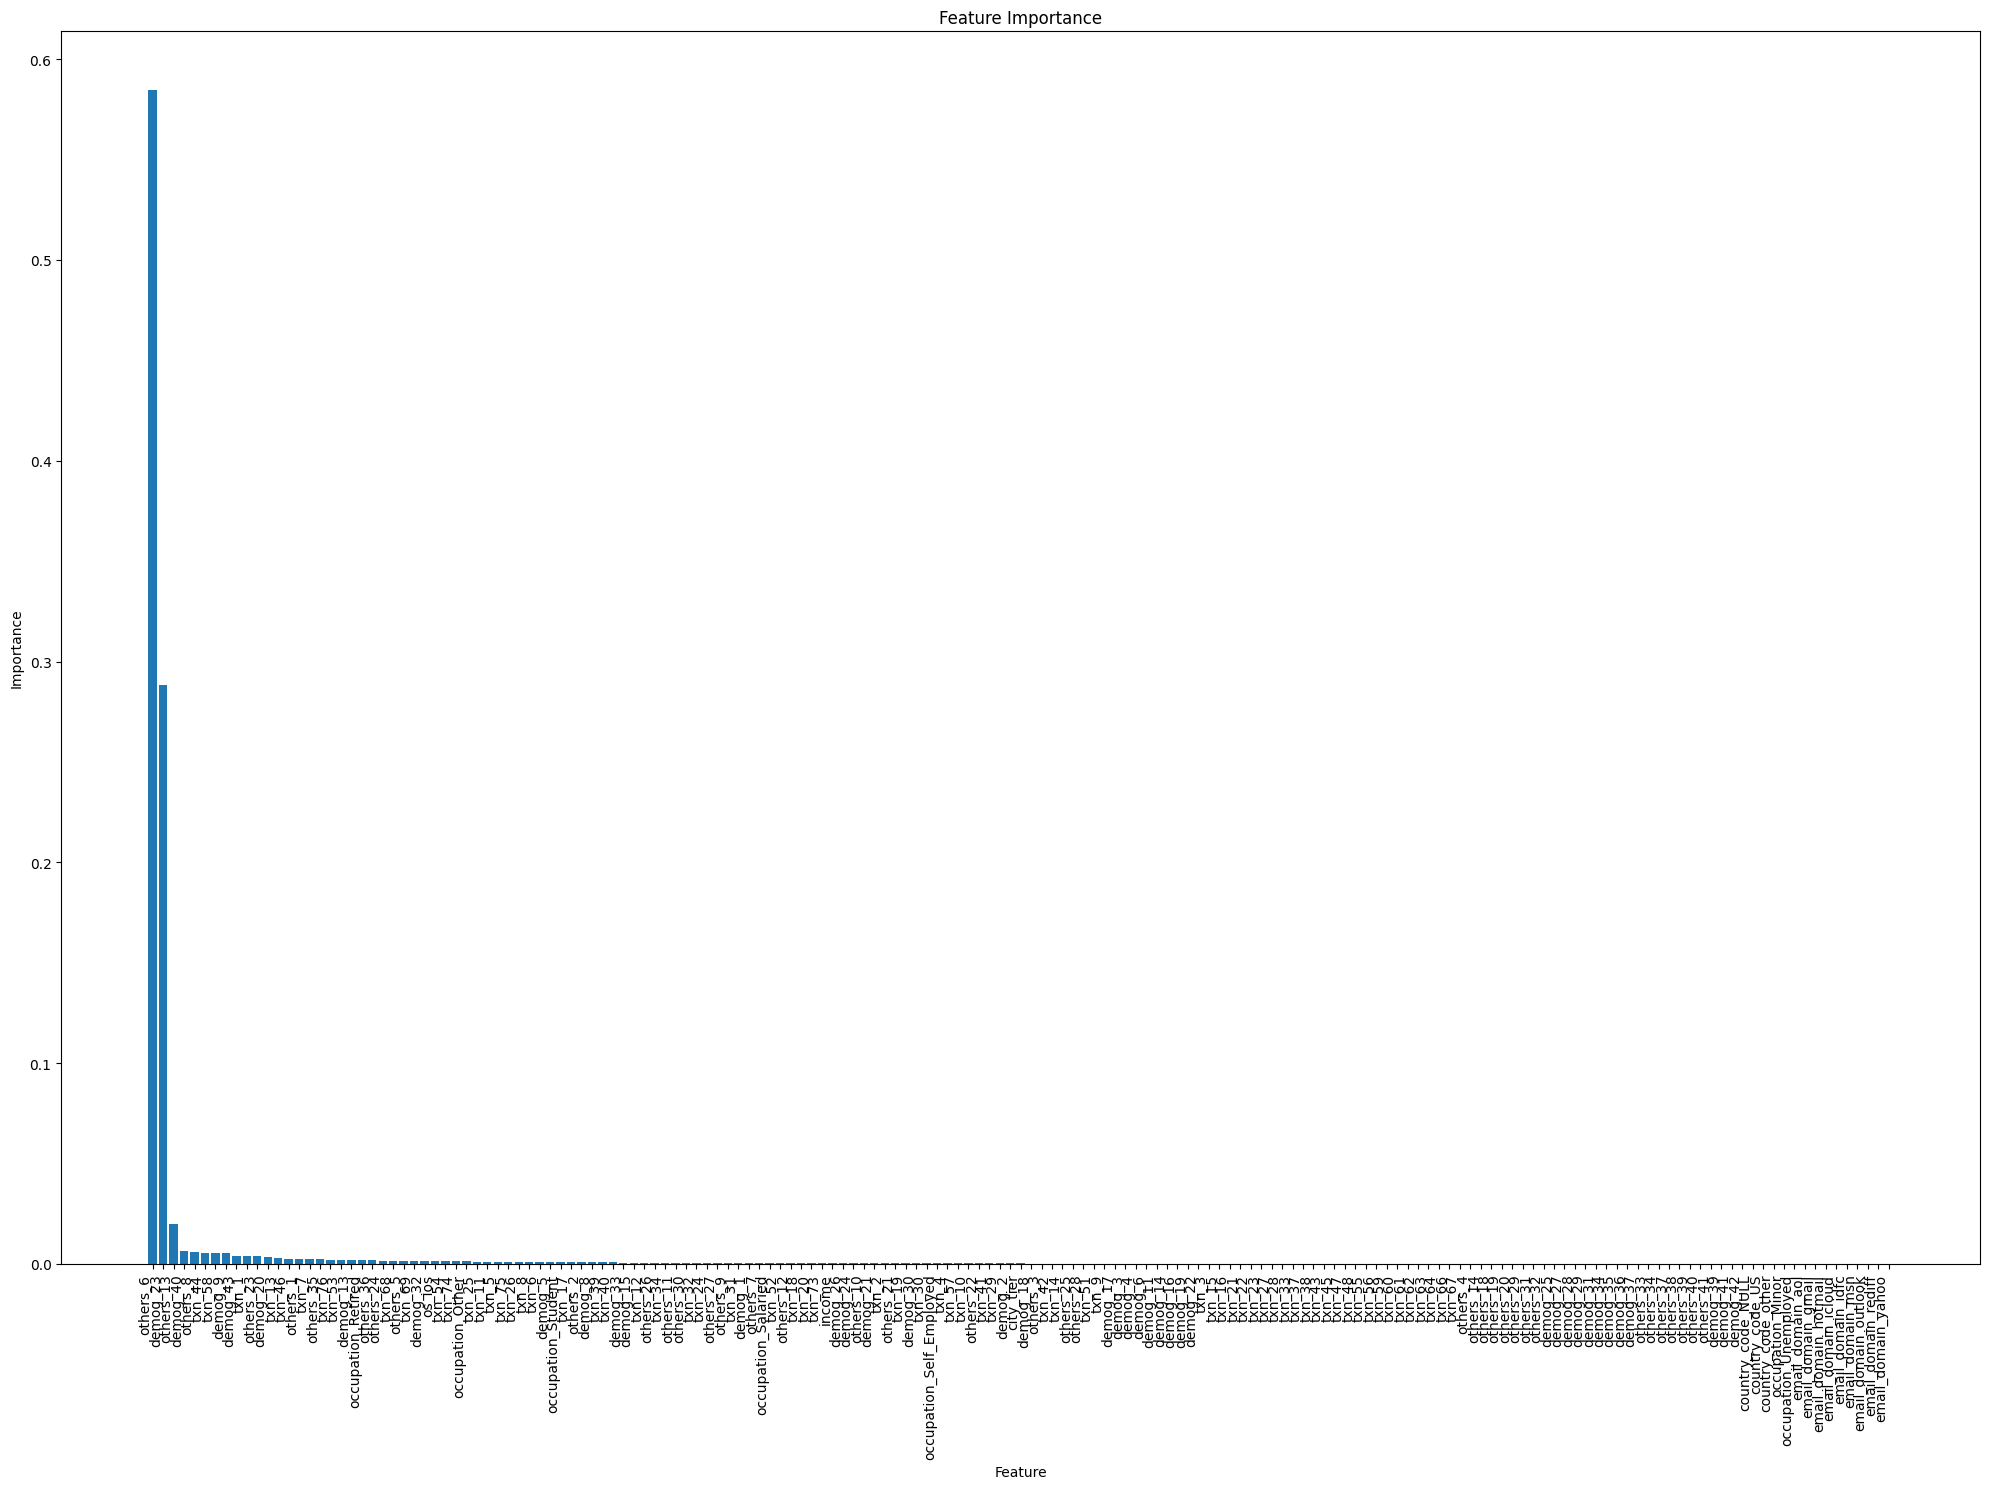

In [ ]:
feature_importances = xgbc.feature_importances_

# Create a dictionary with feature names and their corresponding importances
feature_importance_dict = dict(zip(X_train_smote.columns, feature_importances))

sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

indices_xgb = np.argsort(feature_importances)[::-1]
top_features_indices_xgb = indices_xgb[:75]
# Plot feature importances as a bar chart
plt.figure(figsize=(20,15))
plt.bar(sorted_feature_importance.keys(), sorted_feature_importance.values())
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [ ]:
xgb_top_75 = feature_names[top_features_indices_xgb]

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(score_func=f_classif, k=75)

# Fit and transform the training data
X_train_selected = k_best.fit_transform(X_train_smote, y_train_smote)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = np.array(features.columns)[selected_feature_indices]

selected_feature_names


array(['income', 'demog_9', 'demog_13', 'demog_19', 'demog_20',
       'demog_21', 'txn_1', 'txn_2', 'txn_5', 'txn_6', 'txn_7', 'txn_8',
       'txn_9', 'txn_11', 'txn_12', 'txn_17', 'txn_18', 'txn_19',
       'txn_21', 'txn_25', 'txn_26', 'txn_41', 'txn_51', 'txn_54',
       'txn_57', 'txn_58', 'txn_69', 'txn_73', 'txn_74', 'txn_75',
       'txn_76', 'others_1', 'others_2', 'others_3', 'others_5',
       'others_6', 'others_7', 'others_8', 'others_9', 'others_10',
       'others_11', 'others_12', 'others_13', 'others_14', 'others_18',
       'others_21', 'others_22', 'others_23', 'others_24', 'others_25',
       'others_26', 'others_29', 'others_31', 'demog_23', 'demog_24',
       'demog_26', 'demog_27', 'demog_32', 'demog_34', 'others_35',
       'others_36', 'others_37', 'others_39', 'demog_40', 'demog_41',
       'demog_42', 'demog_43', 'country_code_NULL', 'occupation_Other',
       'occupation_Salaried', 'occupation_Self_Employed',
       'occupation_Student', 'os_ios', 'email_do

### Only XGBoost's features

In [ ]:
X_train_feat_sel = X_train_smote[xgb_top_75]

In [ ]:
len(X_train_feat_sel.columns)

75

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train_feat_sel, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
X_val_feat_sel = X_val[xgb_top_75]

Accuracy: 0.9956
Precision: 0.8786
Recall: 0.9050
F1 Score: 0.8916
ROC AUC: 0.9991


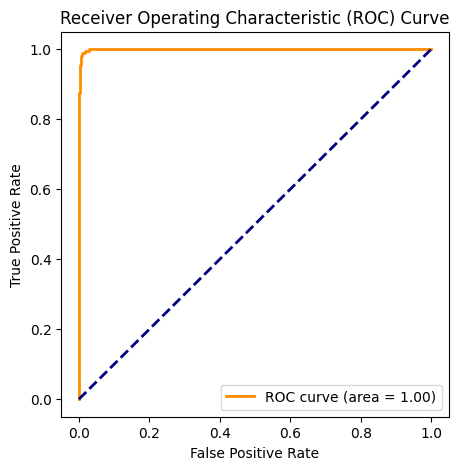

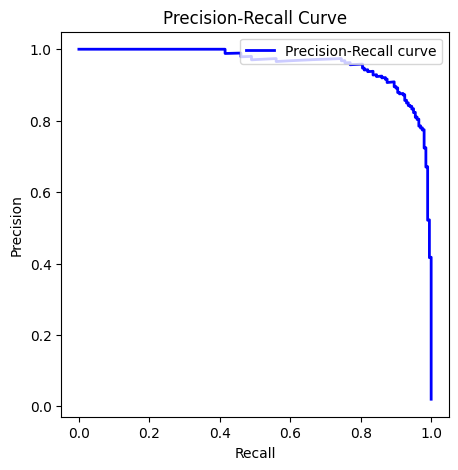

In [ ]:
y_pred = xgbc.predict(X_val_feat_sel)
y_pred_proba = xgbc.predict_proba(X_val_feat_sel)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:
rnf = RandomForestClassifier()
rnf.fit(X_train_feat_sel, y_train_smote)

RandomForestClassifier()

Accuracy: 0.9958
Precision: 0.8798
Recall: 0.9150
F1 Score: 0.8971
ROC AUC: 0.9991


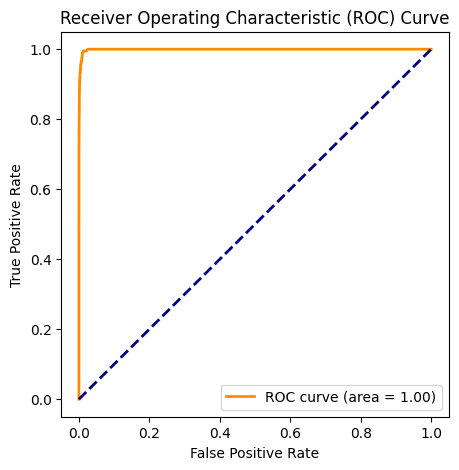

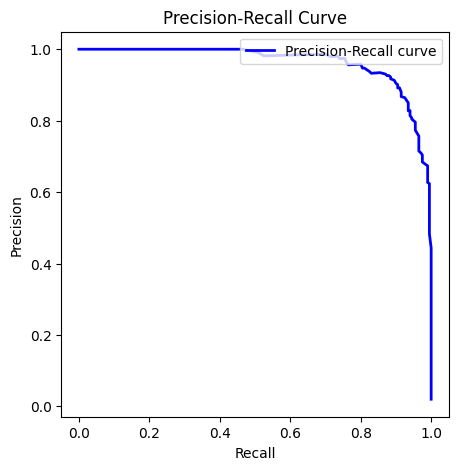

In [ ]:
y_pred = rnf.predict(X_val_feat_sel)
y_pred_proba = rnf.predict_proba(X_val_feat_sel)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train_feat_sel, y_train_smote)

AdaBoostClassifier()

Accuracy: 0.9951
Precision: 0.8545
Recall: 0.9100
F1 Score: 0.8814
ROC AUC: 0.9989


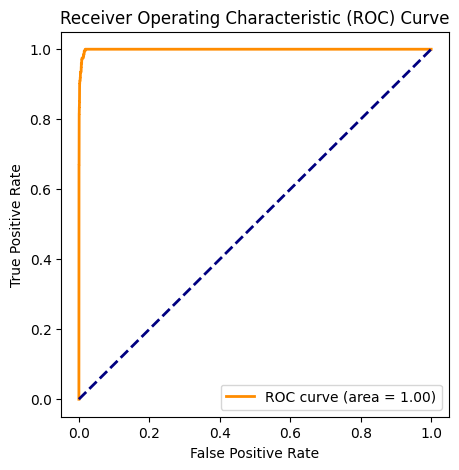

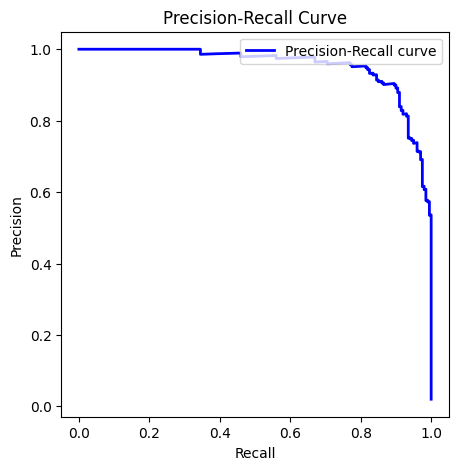

In [ ]:
y_pred = abc.predict(X_val_feat_sel)
y_pred_proba = abc.predict_proba(X_val_feat_sel)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

### Only Random forest's features

In [ ]:
X_train_feat_sel = X_train_smote[rnf_top_75]
X_val_feat_sel = X_val[rnf_top_75]

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train_feat_sel, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
rnf = RandomForestClassifier()
rnf.fit(X_train_feat_sel, y_train_smote)

RandomForestClassifier()

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train_feat_sel, y_train_smote)

AdaBoostClassifier()

#### XGBoost Model

Accuracy: 0.9961
Precision: 0.8966
Recall: 0.9100
F1 Score: 0.9032
ROC AUC: 0.9991


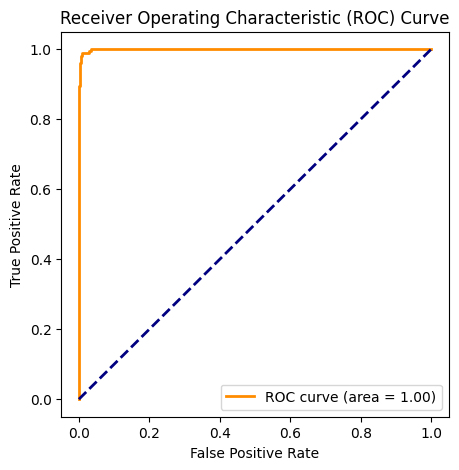

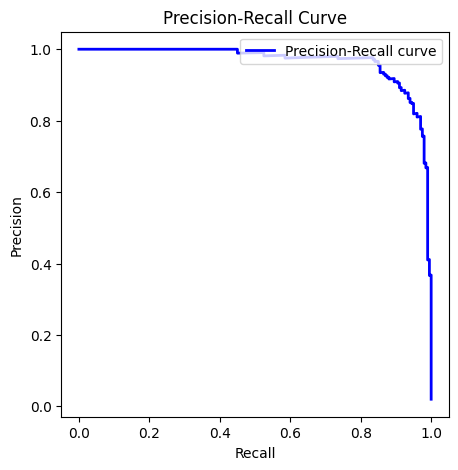

In [ ]:
y_pred = xgbc.predict(X_val_feat_sel)
y_pred_proba = xgbc.predict_proba(X_val_feat_sel)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

#### RnF model

Accuracy: 0.9954
Precision: 0.8598
Recall: 0.9200
F1 Score: 0.8889
ROC AUC: 0.9992


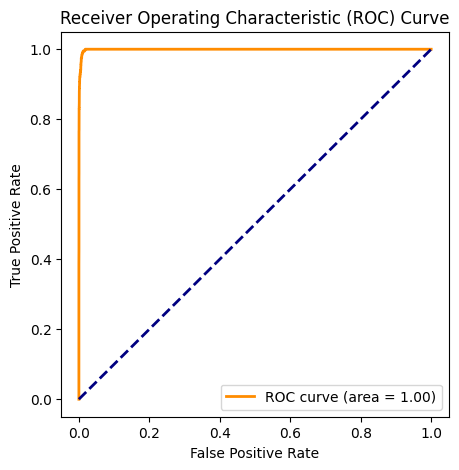

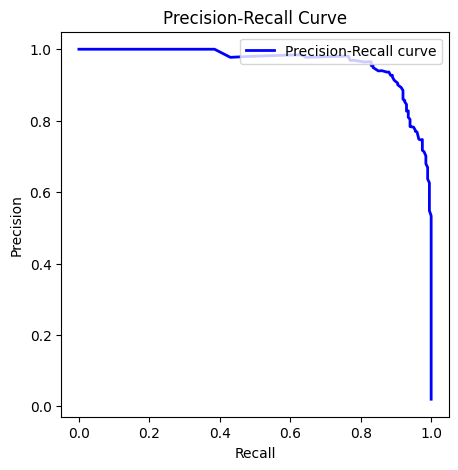

In [ ]:
y_pred = rnf.predict(X_val_feat_sel)
y_pred_proba = rnf.predict_proba(X_val_feat_sel)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

#### AdaBoost Model

Accuracy: 0.9947
Precision: 0.8356
Recall: 0.9150
F1 Score: 0.8735
ROC AUC: 0.9989


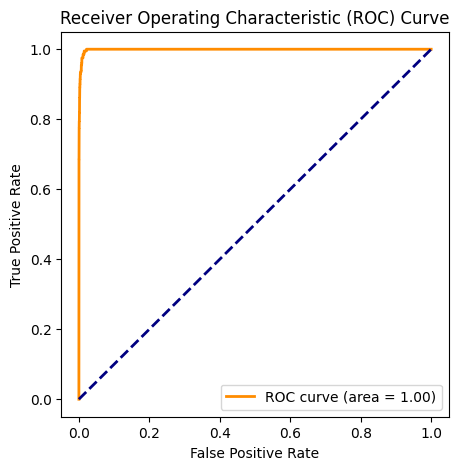

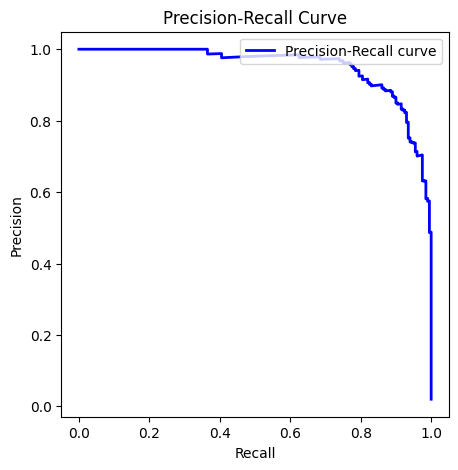

In [ ]:
y_pred = abc.predict(X_val_feat_sel)
y_pred_proba = abc.predict_proba(X_val_feat_sel)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## XGBoost intersection RnF features

In [ ]:

# Convert lists to sets for easy comparison
set1 = set(rnf_top_75)
set2 = set(xgb_top_75)

# Find common elements
common_features = set1.intersection(set2)

# Find elements that are not common in both lists
not_common_elements = set1.symmetric_difference(set2)

# Convert the result back to a list
not_common_elements_list = list(not_common_elements)

# Display the results
print("Common elements:", list(common_features))
print("Elements not common in both lists:", not_common_elements_list)


Common elements: ['others_9', 'txn_30', 'txn_1', 'demog_13', 'os_ios', 'txn_5', 'others_35', 'demog_8', 'others_11', 'txn_25', 'others_5', 'demog_9', 'txn_8', 'others_23', 'others_1', 'occupation_Salaried', 'txn_19', 'others_13', 'demog_15', 'txn_40', 'others_8', 'txn_58', 'demog_26', 'demog_40', 'others_10', 'txn_26', 'income', 'demog_20', 'others_36', 'demog_32', 'occupation_Other', 'txn_7', 'txn_44', 'others_21', 'txn_2', 'demog_5', 'others_6', 'txn_76', 'txn_54', 'others_24', 'txn_75', 'txn_53', 'txn_12', 'demog_23', 'others_2', 'demog_1', 'txn_68', 'txn_39', 'txn_18', 'demog_24', 'txn_74', 'demog_21', 'txn_69', 'txn_73', 'others_7', 'others_26', 'txn_11', 'demog_43', 'txn_46', 'txn_6', 'txn_52', 'others_12', 'occupation_Student']
Elements not common in both lists: ['txn_34', 'txn_20', 'txn_57', 'demog_30', 'others_30', 'others_27', 'txn_10', 'txn_41', 'others_25', 'txn_31', 'city_tier', 'occupation_Retired', 'demog_33', 'txn_9', 'demog_17', 'txn_17', 'demog_2', 'others_18', 'occup

In [ ]:
X_train_feat_sel = X_train_smote[common_features]
X_val_feat_sel = X_val[common_features]

<ipython-input-176-03e7ee21a040>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train_feat_sel = X_train_smote[common_features]
<ipython-input-176-03e7ee21a040>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_val_feat_sel = X_val[common_features]


In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train_feat_sel, y_train_smote)

rnf = RandomForestClassifier()
rnf.fit(X_train_feat_sel, y_train_smote)

abc = AdaBoostClassifier()
abc.fit(X_train_feat_sel, y_train_smote)

AdaBoostClassifier()

#### XGBoost model

Accuracy: 0.9967
Precision: 0.9113
Recall: 0.9250
F1 Score: 0.9181
ROC AUC: 0.9990


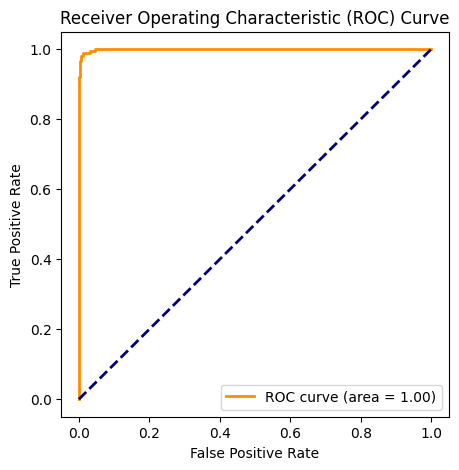

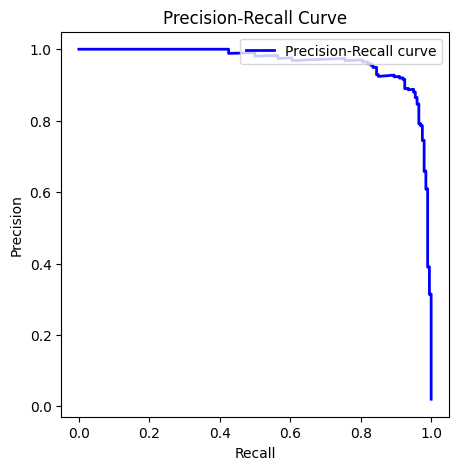

In [ ]:
y_pred = xgbc.predict(X_val_feat_sel)
y_pred_proba = xgbc.predict_proba(X_val_feat_sel)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

#### RandomForest Model

Accuracy: 0.9955
Precision: 0.8638
Recall: 0.9200
F1 Score: 0.8910
ROC AUC: 0.9992


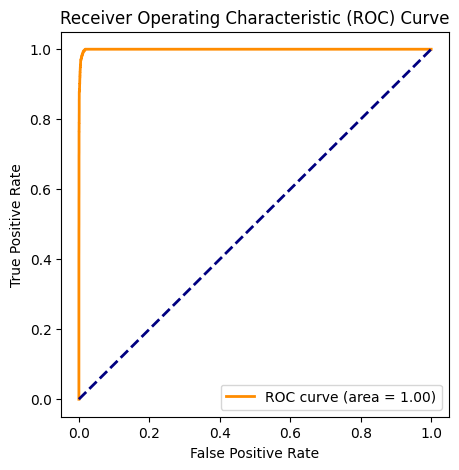

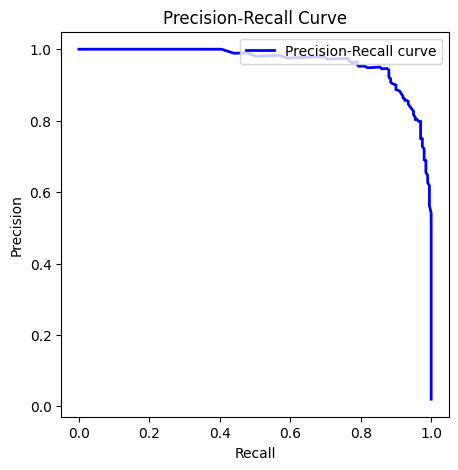

In [ ]:
y_pred = rnf.predict(X_val_feat_sel)
y_pred_proba = rnf.predict_proba(X_val_feat_sel)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

#### AdaBoost Model

Accuracy: 0.9951
Precision: 0.8545
Recall: 0.9100
F1 Score: 0.8814
ROC AUC: 0.9989


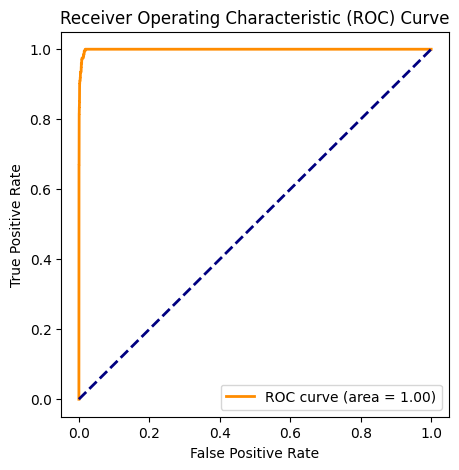

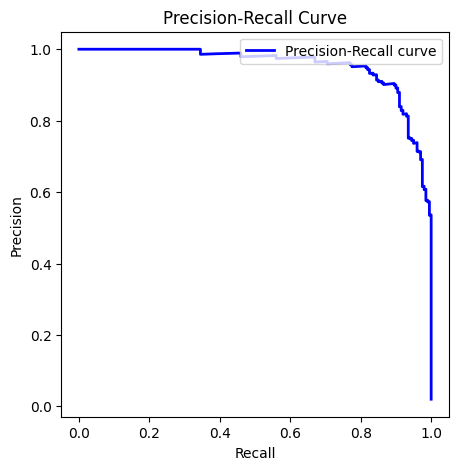

In [ ]:
y_pred = abc.predict(X_val_feat_sel)
y_pred_proba = abc.predict_proba(X_val_feat_sel)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Display the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Trying Ensembles

Random Forest Accuracy: 0.9956
XGBoost Accuracy: 0.9967
Random Forest Confusion Matrix:
[[9772   28]
 [  16  184]]
XGBoost Confusion Matrix:
[[9782   18]
 [  15  185]]
Voting Classifier Accuracy: 0.9964
Voting Classifier Confusion Matrix:
[[9781   19]
 [  17  183]]
Stacking Classifier Accuracy: 0.9962
Stacking Classifier Confusion Matrix:
[[9776   24]
 [  14  186]]


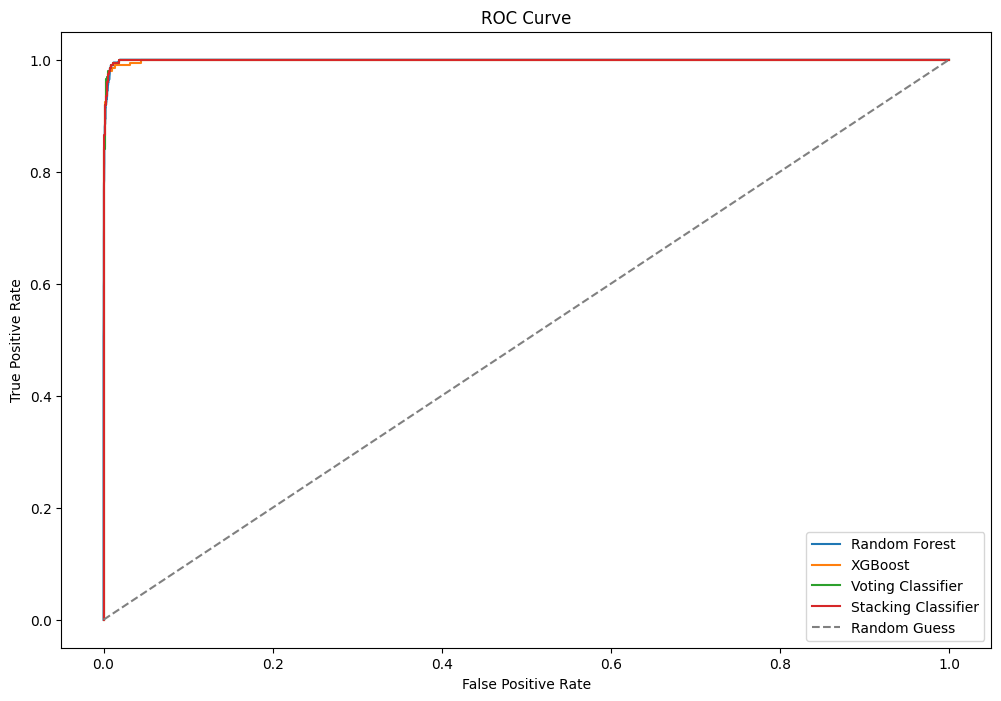

Random Forest AUC: 0.9991941326530612
XGBoost AUC: 0.9990403061224489
Voting Classifier AUC: 0.9993403061224491
Stacking Classifier AUC: 0.9992933673469389


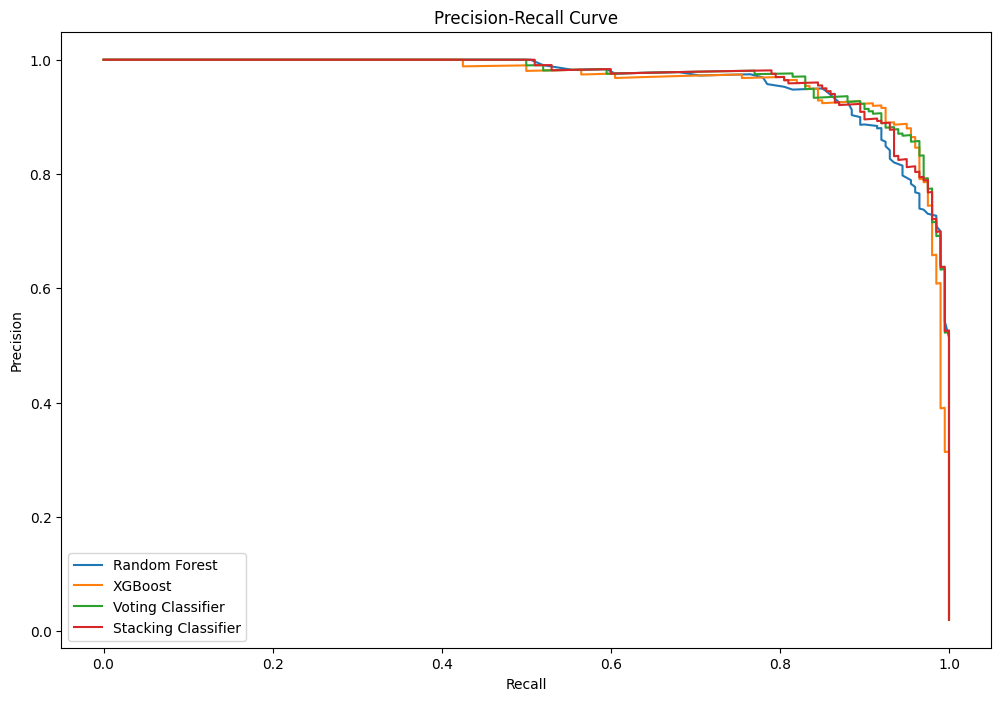

Random Forest Average Precision: 0.8679245283018868
XGBoost Average Precision: 0.9113300492610837
Voting Classifier Average Precision: 0.905940594059406
Stacking Classifier Average Precision: 0.8857142857142857
Random Forest Average Recall: 0.92
XGBoost Average Recall: 0.925
Voting Classifier Average Recall: 0.915
Stacking Classifier Average recall: 0.93


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression



# Create individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train individual classifiers
rf_classifier.fit(X_train_feat_sel, y_train_smote)
xgb_classifier.fit(X_train_feat_sel, y_train_smote)

# Make predictions on the test set
rf_pred = rf_classifier.predict(X_val_feat_sel)
xgb_pred = xgb_classifier.predict(X_val_feat_sel)

# Evaluate individual classifiers
rf_accuracy = accuracy_score(y_val, rf_pred)
xgb_accuracy = accuracy_score(y_val, xgb_pred)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"XGBoost Accuracy: {xgb_accuracy}")

# Print Confusion Matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_val, rf_pred))

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_val, xgb_pred))

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier)
], voting='soft')

# Train the Voting Classifier
voting_classifier.fit(X_train_feat_sel, y_train_smote)

# Make predictions on the test set
voting_pred = voting_classifier.predict(X_val_feat_sel)

# Evaluate the Voting Classifier
voting_accuracy = accuracy_score(y_val, voting_pred)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# Print Confusion Matrix
print("Voting Classifier Confusion Matrix:")
print(confusion_matrix(y_val, voting_pred))

# Create a Stacking Classifier with a logistic regression meta-classifier
stacking_classifier = StackingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier)
], final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_classifier.fit(X_train_feat_sel, y_train_smote)

# Make predictions on the test set
stacking_pred = stacking_classifier.predict(X_val_feat_sel)

# Evaluate the Stacking Classifier
stacking_accuracy = accuracy_score(y_val, stacking_pred)
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")

# Print Confusion Matrix
print("Stacking Classifier Confusion Matrix:")
print(confusion_matrix(y_val, stacking_pred))

# Plot ROC curves
plt.figure(figsize=(12, 8))
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf_classifier.predict_proba(X_val_feat_sel)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, xgb_classifier.predict_proba(X_val_feat_sel)[:, 1])
fpr_voting, tpr_voting, _ = roc_curve(y_val, voting_classifier.predict_proba(X_val_feat_sel)[:, 1])
fpr_stacking, tpr_stacking, _ = roc_curve(y_val, stacking_classifier.predict_proba(X_val_feat_sel)[:, 1])

plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_voting, tpr_voting, label='Voting Classifier')
plt.plot(fpr_stacking, tpr_stacking, label='Stacking Classifier')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_voting = auc(fpr_voting, tpr_voting)
auc_stacking = auc(fpr_stacking, tpr_stacking)

print(f"Random Forest AUC: {auc_rf}")
print(f"XGBoost AUC: {auc_xgb}")
print(f"Voting Classifier AUC: {auc_voting}")
print(f"Stacking Classifier AUC: {auc_stacking}")

# Plot Precision-Recall curves
plt.figure(figsize=(12, 8))
precision_rf, recall_rf, _ = precision_recall_curve(y_val, rf_classifier.predict_proba(X_val_feat_sel)[:, 1])
precision_xgb, recall_xgb, _ = precision_recall_curve(y_val, xgb_classifier.predict_proba(X_val_feat_sel)[:, 1])
precision_voting, recall_voting, _ = precision_recall_curve(y_val, voting_classifier.predict_proba(X_val_feat_sel)[:, 1])
precision_stacking, recall_stacking, _ = precision_recall_curve(y_val, stacking_classifier.predict_proba(X_val_feat_sel)[:, 1])

plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.plot(recall_voting, precision_voting, label='Voting Classifier')
plt.plot(recall_stacking, precision_stacking, label='Stacking Classifier')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Calculate Average Precision
average_precision_rf = precision_score(y_val, rf_classifier.predict(X_val_feat_sel))
average_precision_xgb = precision_score(y_val, xgb_classifier.predict(X_val_feat_sel))
average_precision_voting = precision_score(y_val, voting_classifier.predict(X_val_feat_sel))
average_precision_stacking = precision_score(y_val, stacking_classifier.predict(X_val_feat_sel))

print(f"Random Forest Average Precision: {average_precision_rf}")
print(f"XGBoost Average Precision: {average_precision_xgb}")
print(f"Voting Classifier Average Precision: {average_precision_voting}")
print(f"Stacking Classifier Average Precision: {average_precision_stacking}")


# Calculate Average Recall
average_recall_rf = recall_score(y_val, rf_classifier.predict(X_val_feat_sel))
average_recall_xgb = recall_score(y_val, xgb_classifier.predict(X_val_feat_sel))
average_recall_voting = recall_score(y_val, voting_classifier.predict(X_val_feat_sel))
average_recall_stacking = recall_score(y_val, stacking_classifier.predict(X_val_feat_sel))

print(f"Random Forest Average Recall: {average_recall_rf}")
print(f"XGBoost Average Recall: {average_recall_xgb}")
print(f"Voting Classifier Average Recall: {average_recall_voting}")
print(f"Stacking Classifier Average recall: {average_recall_stacking}")


### Train a LightBGM Model

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train_feat_sel, label=y_train_smote)
test_data = lgb.Dataset(X_val_feat_sel, label=y_val, reference=train_data)

In [ ]:
params = {
    'objective': 'binary',  # or 'multiclass' for multi-class classification
    'metric': 'binary_logloss',  # or other appropriate metrics
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

In [ ]:
num_round = 100  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Info] Number of positive: 78401, number of negative: 78401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13282
[LightGBM] [Info] Number of data points in the train set: 156802, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
y_pred_prob = bst.predict(X_val_feat_sel)
y_pred = (y_pred_prob > 0.5).astype(int)

Accuracy: 0.9949
Precision: 0.8282
Recall: 0.9400
F1 Score: 0.8806
ROC AUC: 0.9990


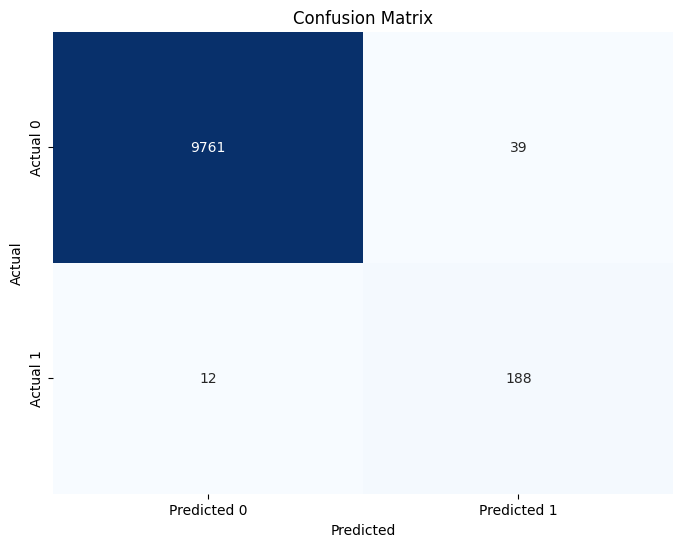

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_prob)
conf_matrix = confusion_matrix(y_val, y_pred)

# Display the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Testing all the models on Test Data

In [ ]:
X_test_sel = X_test[common_features]

<ipython-input-188-9f00d7fdbe4b>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test_sel = X_test[common_features]


In [ ]:
test_metrics = {'Random Forest': [0, 0, 0, 0],
                'XGBoost': [0, 0, 0, 0],
                'LightBGM': [0, 0, 0, 0]
                }
test_metrics = pd.DataFrame(test_metrics)
test_metrics.index = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
test_metrics.head()

,Random Forest,XGBoost,LightBGM
Accuracy,0,0,0
Precision,0,0,0
Recall,0,0,0
F1_Score,0,0,0


In [ ]:
y_pred_rnf = rnf.predict(X_test_sel)
y_pred_xgb = xgbc.predict(X_test_sel)
y_pred_prob_lbgm = bst.predict(X_test_sel)
y_pred_lgbm = (y_pred_prob_lbgm > 0.5).astype(int)

In [ ]:
metrics_rnf = [accuracy_score(y_test, y_pred_rnf), recall_score(y_test, y_pred_rnf), precision_score(y_test, y_pred_rnf), f1_score(y_test, y_pred_rnf)]
metrics_xgb = [accuracy_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb)]
metrics_lgbm = [accuracy_score(y_test, y_pred_lgbm), recall_score(y_test, y_pred_lgbm), precision_score(y_test, y_pred_lgbm), f1_score(y_test, y_pred_lgbm)]

In [ ]:
test_metrics['Random Forest'] = metrics_rnf
test_metrics['XGBoost'] = metrics_xgb
test_metrics['LightBGM'] = metrics_lgbm

In [ ]:
test_metrics

,Random Forest,XGBoost,LightBGM
Accuracy,0.997000,0.996900,0.996300
Precision,0.945274,0.920398,0.940299
Recall,0.909091,0.925000,0.883178
F1_Score,0.926829,0.922693,0.910843


# Predicting Probablities on Test Set

In [ ]:
dtrain = xgb.DMatrix(X_train_feat_sel, label=y_train_smote)
dtest = xgb.DMatrix(X_test_sel, label = y_test)

params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Logarithmic loss for classification problems
    'max_depth': 10,
    'learning_rate': 0.1,
    'n_estimators': 100
}

model = xgb.train(params, dtrain, num_boost_round=100)

predictions_probabilities = model.predict(dtest, output_margin=True)
predictions = model.predict(dtest)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:05:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
predictions_probabilities

array([-7.394686 , -7.349085 , -8.497132 , ..., -6.9423738, -7.877436 ,
       -8.369138 ], dtype=float32)

In [ ]:
predictions

array([0.18399501, 0.18399501, 0.18399501, ..., 0.18399501, 0.18399501,
       0.18399501], dtype=float32)

In [ ]:
pred = [(preds>0.5).astype(int) for preds in predictions]

In [ ]:
print(accuracy_score(y_test, pred))

0.9969


In [ ]:
print(recall_score(y_test, pred))

0.9402985074626866


In [ ]:
y_test.value_counts()/len(y_test)

0    0.9799
1    0.0201
Name: Target, dtype: float64

In [ ]:
!pip install shap
!pip install lime

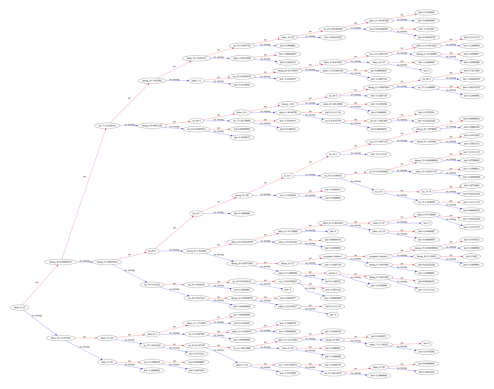

<Figure size 3000x1000 with 0 Axes>

In [ ]:
xgb.plot_tree(model, num_trees=0, rankdir='LR')  # Adjust num_trees for different trees
plt.figure(figsize = (30, 10))
plt.show()

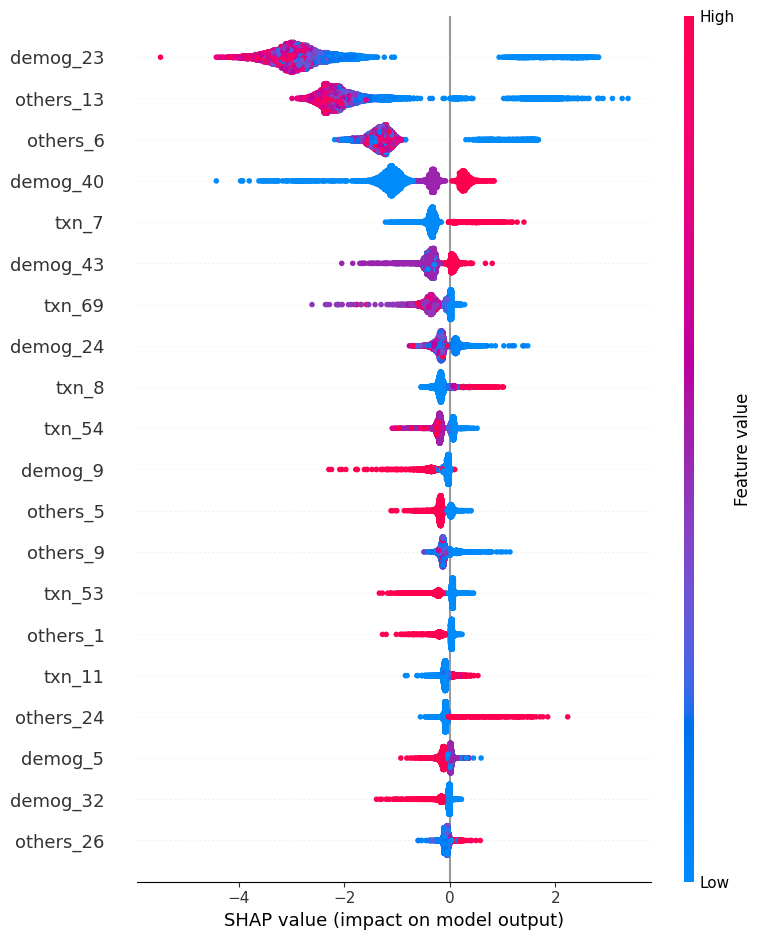

In [ ]:
import shap
explainer = shap.TreeExplainer(model)

# Get SHAP values for the test set
shap_values = explainer.shap_values(dtest)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_sel)

# final dataset prediction of probablities

In [ ]:
given_df = pd.read_csv('/content/drive/My Drive/Preprocessed_data/df_val_final.csv')

In [ ]:
given_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
selected_df = given_df[common_features]

<ipython-input-207-fcedcc8fad08>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  selected_df = given_df[common_features]


In [ ]:
dfinal = xgb.DMatrix(selected_df)
predictions = model.predict(dfinal)

In [ ]:
predictions

array([1.7576283e-04, 3.6976726e-05, 3.6053221e-05, ..., 9.7858185e-01,
       9.9109054e-01, 9.9985421e-01], dtype=float32)

In [ ]:
final_dataset_raw = pd.read_excel('/content/drive/My Drive/validation_data_to_be_shared.xlsx')

In [ ]:
final_dataset_raw.columns

Index(['Primary key', 'account_opening_date', 'country_code', 'demog_1',
       'demog_2', 'income', 'demog_3', 'city_tier', 'occupation', 'demog_4',
       ...
       'demog_39', 'email_domain', 'demog_40', 'demog_41', 'others_42',
       'others_43', 'others_44', 'others_45', 'demog_42', 'demog_43'],
      dtype='object', length=177)

In [ ]:
final_df = pd.DataFrame(np.array(final_dataset_raw['Primary key']))
final_df['Prediction Probablities'] = predictions

In [ ]:
final_df.columns = ['Primary Key', 'Prediction Probablities']

In [ ]:
csv_filename = 'final_preds.csv'
final_df.to_csv(csv_filename, index=False)

# Print a message indicating the file has been saved
print(f'DataFrame has been saved to {csv_filename}')

DataFrame has been saved to final_preds.csv
